# Density Panel
Author(s) Paul Miles | August 7, 2018

This tutorial provides a demonstration of the density panel plotting routine available in `mcmcplot`.

In [2]:
# import required packages
import numpy as np
from mcmcplot import mcmatplot as mcm
import warnings
warnings.filterwarnings("ignore")

### Generate Random Chains
The plotting routines are designed to be used in conjunction with the result of a MCMC simulation.  For the purpose of this example, we consider a randomly generated chain.  We will consider a chain with 3 parameters that have the following distributions:
- $p_{0} \sim N(1.0, 0.5)$
- $p_{1} \sim N(2.5, 3.0)$
- $p_{2} \sim N(-1.3, 0.75)$

In [3]:
nsimu = 1000
npar = 3
mu = np.array([1.0, 2.5, -1.3])
sig = np.array([0.5, 3.0, 0.75])
chain = np.zeros([nsimu, npar])
for ii in range(npar):
    chain[:,ii] = sig[ii]*np.random.randn(nsimu,) + mu[ii]

### Default Density Panel
The density panel simply uses a Kernel Density Estimator (KDE) to generate a probability distribution from the sample points in the chain.  Note, the plotting routines output the figure handle as well as a dictionary containing the settings used in generating the plot.

{'maxpoints': 500, 'fig': {'figsize': (5, 4), 'dpi': 100}, 'kde': {'bw': 'normal_reference', 'var_type': 'c'}, 'plot': {'color': 'k', 'marker': None, 'linestyle': '-', 'linewidth': 3}, 'xlabel': {}, 'ylabel': {}, 'hist_on': False, 'hist': {'density': True}}


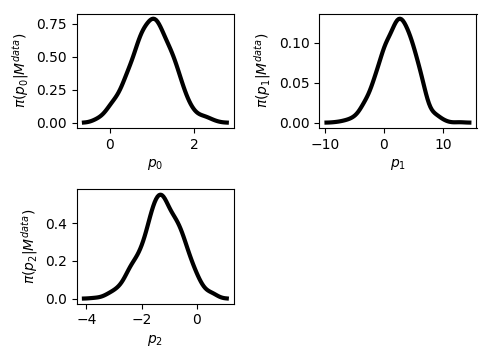

In [4]:
f, settings = mcm.plot_density_panel(chains = chain)
print(settings)

### Add Histogram Beneath KDE
We can add the chain histogram to the plot and adjust various aspects of the appearance.

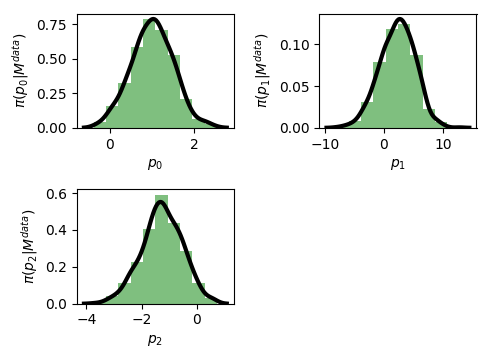

In [19]:
settings = {'hist_on': True, 'hist': dict(color = 'g', alpha = 0.5)}
fd, used_settings = mcm.plot_density_panel(chains = chain, settings = settings)
fd.savefig('basic_density_panel.png')

As the chains were generated from a normal distribution, we would expect the histograms to agree well with the KDE.

### Change Marker Style and Define Parameter Names
We can change the marker style, define the parameter names to be displayed on the plots, and change the dimensions of the figure.

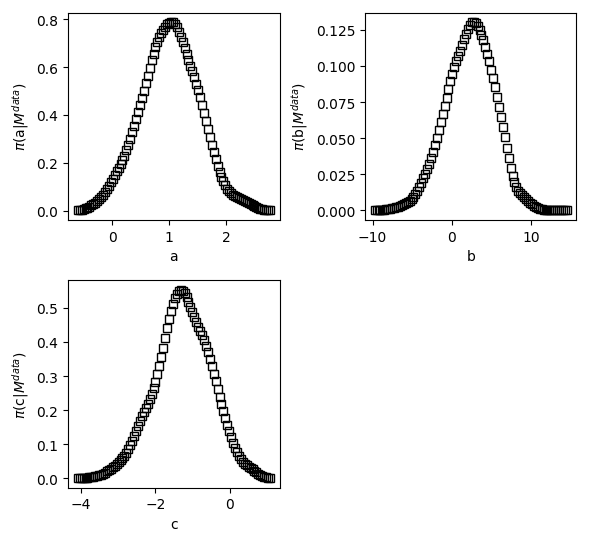

In [11]:
user_settings = dict(plot = dict(marker = 's', mfc = 'none', linestyle = 'none'), fig = dict(figsize = (6,6)))
names = ['a', 'b', 'c']
f, settings = mcm.plot_density_panel(chains = chain, names = names, settings = user_settings)

### Update Label Features
You can also edit the settings for the axis labels.

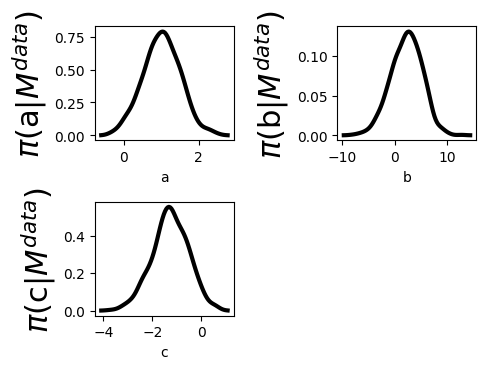

In [12]:
user_settings = dict(ylabel = dict(fontsize = 22))
f, settings = mcm.plot_density_panel(chains = chain, names = names, settings = user_settings)

### Manually Manipulate Plot Features
With the figure handle, you can also individual edit different aspects of the plot.  See [matplotlib's documentation](https://matplotlib.org/index.html) for more details on editing figures.

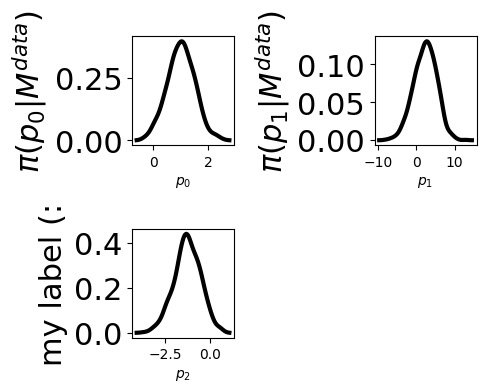

In [18]:
f, settings = mcm.plot_density_panel(chains = chain)
ax = f.get_axes()
for ai in ax:
    ai.set_ylabel(ylabel = ai.get_ylabel(), fontsize = 22)
    ai.set_yticklabels(labels = ai.get_yticklabels(), fontsize = 22)
ax[-1].set_ylabel(ylabel = 'my label (:')
# reset positions to avoid overlap    
f.tight_layout()